# [Gradient Descent Article on KA](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import sympy as sp


def reset_symbols():
    global x, y, z, a, b, c, d, e, f, g, h, r, s, k, t, u, v, w, theta, lmda, rho, phi
    x, y, z = sp.symbols("x y z", real=True)
    a, b, c, d, e, f, g, h, r, s, k, t, u, v, w = sp.symbols(
        "a b c d e f g h r s k t u v w", real=True
    )

    theta = sp.Symbol("theta")
    lmda = sp.Symbol("lambda")
    rho = sp.Symbol("rho")
    phi = sp.Symbol("phi")

In [2]:
reset_symbols()
loss = (y - (b + w * x)) ** 2
loss

loss.diff(b).factor()
loss.diff(w).factor()

(-b - w*x + y)**2

2*(b + w*x - y)

2*x*(b + w*x - y)

In [3]:
x_data = [338.0, 333.0, 328.0, 207.0, 226.0, 25.0, 179.0, 60.0, 208.0, 606.0]
y_data = [640.0, 633.0, 619.0, 393.0, 428.0, 27.0, 193.0, 66.0, 226.0, 1591.0]

# y = b + w * x
len(x_data), len(y_data)

(10, 10)

In [4]:
x = np.arange(-200, -100, 1)  # bias
y = np.arange(-5, 5, 0.1)  # weight
Z = np.zeros((len(x), len(y)))  # 0 (100, 100)

X, Y = np.meshgrid(x, y)


def predict(x, b, w):
    return b + w * x


for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]

        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - predict(x_data[n], b, w)) ** 2
        Z[j][i] /= len(x_data)

        # break

    # break

In [11]:
b = -120
w = -4
lr = 1
iteration = 100000

b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

for i in range(iteration):

    b_grad = 0.0
    w_grad = 0.0

    for n in range(len(x_data)):
        b_grad += 2.0 * (b + w * x_data[n] - y_data[n])  # 2(b+wx−y)
        w_grad += 2.0 * x_data[n] * (b + w * x_data[n] - y_data[n])  # 2x(b+wx−y)

    # print(f"b_grad = {b_grad}, w_grad = {w_grad}")

    # customize lr for each parameter
    lr_b = lr_b + b_grad**2
    lr_w = lr_w + w_grad**2

    # update parameter
    b = b - (lr / np.sqrt(lr_b)) * b_grad
    w = w - (lr / np.sqrt(lr_w)) * w_grad

    # b = b - (lr) * b_grad
    # w = w - (lr) * w_grad

    # store parameters for plotting
    b_history.append(b)
    w_history.append(w)

In [12]:
import matplotlib.pyplot as plt

(-200.0, -100.0)

(-5.0, 5.0)

Text(0.5, 0, '$b$')

Text(0, 0.5, '$w$')

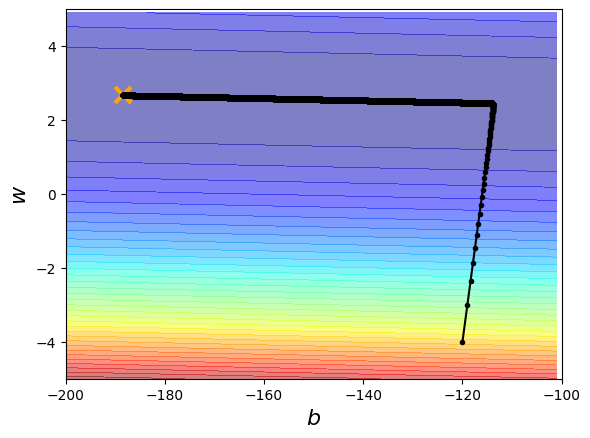

In [13]:
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap("jet"))
plt.plot([-188.4], [2.67], "x", ms=12, markeredgewidth=3, color="orange")
plt.plot(b_history, w_history, "o-", ms=3, lw=1.5, color="black")
plt.xlim(-200, -100)
plt.ylim(-5, 5)

plt.xlabel("$b$", fontsize=16)
plt.ylabel("$w$", fontsize=16)

In [ ]:
[
    ["5", "3", ".", ".", "7", ".", ".", ".", "."],
    ["6", ".", ".", "1", "9", "5", ".", ".", "."],
    [".", "9", "8", ".", ".", ".", ".", "6", "."],
    ["8", ".", ".", ".", "6", ".", ".", ".", "3"],
    ["4", ".", ".", "8", ".", "3", ".", ".", "1"],
    ["7", ".", ".", ".", "2", ".", ".", ".", "6"],
    [".", "6", ".", ".", ".", ".", "2", "8", "."],
    [".", ".", ".", "4", "1", "9", ".", ".", "5"],
    [".", ".", ".", ".", "8", ".", ".", "7", "9"],
]